# Customer Transactions Data Analysis

## Introduction: 

This customer transactions data can be used to obtain meaningful product recommendations based on the frequency of items bought by all customers.
At the high-level, this type of data can be used by big e-commerce companies to provide or guide them  when deciding on sales events, product promotion and powerful product recommendation.
This work will explore some basic plots and underlying trends in the data. 

Data source: https://www.kaggle.com/datasets/devchauhan1/market-basket-optimisationcsv?select=Market_Basket_Optimisation.csv


In [2]:
%pip install mlxtend
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings #To suppress all warnings
warnings.filterwarnings("ignore")

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 640.0 kB/s eta 0:00:03
   - -------------------------------------- 0.0/1.4 MB 495.5 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 1.3 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 2.4 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 2.8 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.4 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.8 MB/s eta 0:00:00


In [3]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

In [4]:
data = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


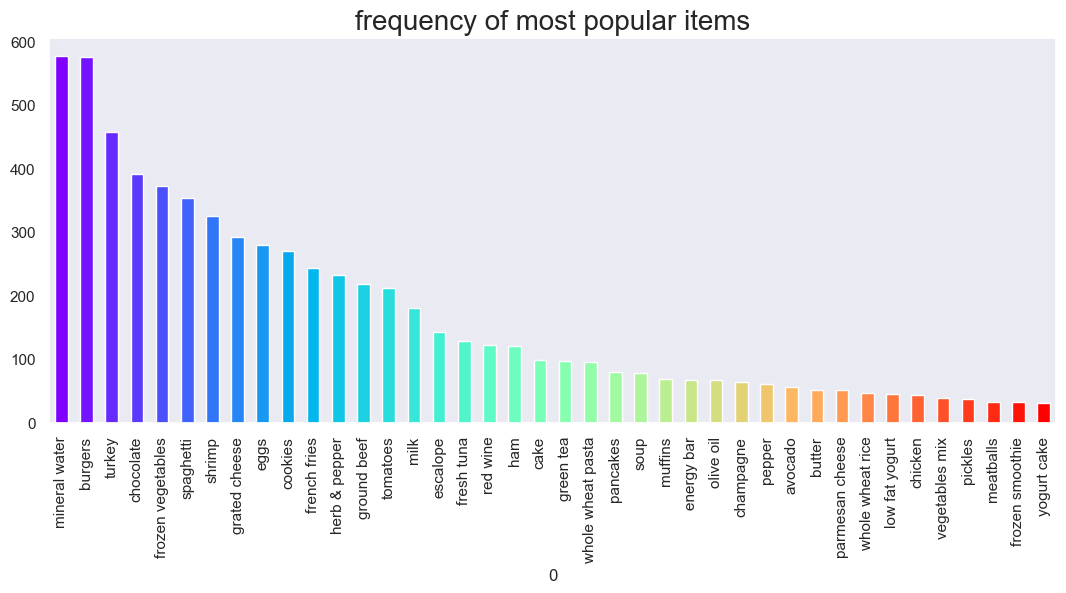

In [7]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [8]:
import networkx as nx
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

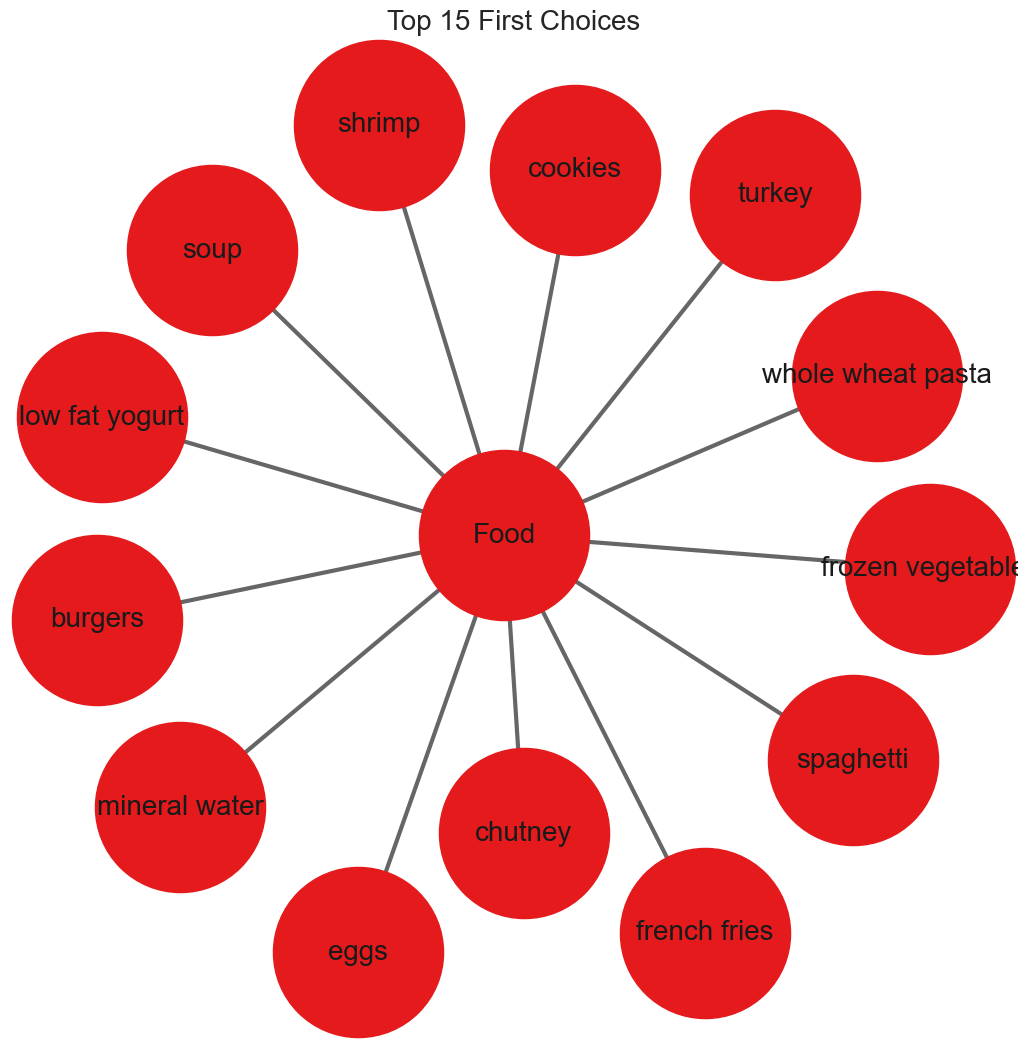

In [9]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

In [10]:
# Getting the list of transactions from the dataset
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])
    
transactions[:1]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil',
  'Food']]

In [12]:
%pip install apyori
from apyori import apriori

transactions_list=[]
for i in range(1,7501):
    transactions_list.append([str(data.values[i,j]) for j in range(0,20)])


#applying apriori algorithm
association_rules = apriori(transactions_list, min_support=0.003, min_confidence=0.2, min_lift=3, min_length=2, max_length=2)
results = list(association_rules)

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=37311b061264b720ece5d27ee988954604fe54bd6d0d2b1529e7a92b0f0802d0
  Stored in directory: c:\users\dumbl\appdata\local\pip\cache\wheels\77\3d\a6\d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [14]:
for i in range(0, len(results)):
    print(results[i][0])

frozenset({'chicken', 'light cream'})
frozenset({'mushroom cream sauce', 'escalope'})
frozenset({'pasta', 'escalope'})
frozenset({'honey', 'fromage blanc'})
frozenset({'herb & pepper', 'ground beef'})
frozenset({'tomato sauce', 'ground beef'})
frozenset({'olive oil', 'light cream'})
frozenset({'whole wheat pasta', 'olive oil'})
frozenset({'pasta', 'shrimp'})


In [15]:
#VISUALIZING RESULTS
# Display first results from rules 
# results = list(rules) 
# results

#Putting results well organised in a Pandas Dataframe
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), 
                                  columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

# Display results in Data frame sorted by lift column
resultsinDataFrame.nlargest(n = 10, columns='Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.178128
0,light cream,chicken,0.004533,0.290598,4.843305
2,pasta,escalope,0.005867,0.372881,4.700185
8,pasta,shrimp,0.005067,0.322034,4.514494
7,whole wheat pasta,olive oil,0.008000,0.271493,4.130221
5,tomato sauce,ground beef,0.005333,0.377358,3.840147
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790327
4,herb & pepper,ground beef,0.016000,0.323450,3.291555
6,light cream,olive oil,0.003200,0.205128,3.120612


## CONCLUSION:
Customers who bought  fromage blanc also bought honey with 25% chance and 5 unit of lift strength (strength of association).
This rule appeared 0.0033 of transactions approximately 24 transactions.
Similar rule and association is also seen for light cream and chicken. 

## Lift = The most important metric to measure the strength of rule.